# **Prática - Anova 2 Fatores**

In [12]:
import pandas as pd
import pingouin as pg 
import numpy as pn

In [13]:
df = pd.read_csv("./anova2_1.csv")
df.head()

,Gênero,Álcool,Memória,Grupo
0,Masculino,4C,20,F
1,Feminino,4C,50,C
2,Feminino,4C,55,C
3,Masculino,4C,30,F
4,Masculino,2C,85,E


In [14]:
df.shape

(48, 4)

In [15]:
df.groupby(["Gênero", "Álcool"])["Memória"].describe()

count    mean        std   min    25%   50%    75%   max
Gênero    Álcool                                                          
Feminino  0C        8.0  60.625   4.955156  55.0  58.75  60.0  61.25  70.0
          2C        8.0  62.500   6.546537  50.0  60.00  62.5  66.25  70.0
          4C        8.0  57.500   7.071068  50.0  53.75  55.0  61.25  70.0
Masculino 0C        8.0  66.875  10.329396  50.0  62.50  67.5  75.00  80.0
          2C        8.0  66.875  12.517844  45.0  60.00  67.5  72.50  85.0
          4C        8.0  35.625  10.835622  20.0  30.00  32.5  41.25  55.0

In [16]:
df.groupby(["Álcool"])["Memória"].describe()

,count,mean,std,min,25%,50%,75%,max
Álcool,,,,,,,,
0C,16.0,63.7500,8.465617,50.0,58.75,62.5,70.0,80.0
2C,16.0,64.6875,9.911063,45.0,60.00,65.0,70.0,85.0
4C,16.0,46.5625,14.343262,20.0,33.75,50.0,55.0,70.0


In [17]:
df.groupby(["Gênero"])["Memória"].describe()

,count,mean,std,min,25%,50%,75%,max
Gênero,,,,,,,,
Feminino,24.0,60.208333,6.338147,50.0,55.00,60.0,65.0,70.0
Masculino,24.0,56.458333,18.502595,20.0,43.75,60.0,70.0,85.0


### Aplicando Bartlett aos Dados

Bartlett é um teste estatístico usado para avaliar a igualdade das variâncias de diferentes grupos de dados. É especialmente útil quando se deseja comparar a variabilidade de múltiplas amostras para determinar se elas têm a mesma variância populacional. O teste de Bartlett é sensível à normalidade dos dados e pode ser aplicado quando as amostras são independentes e seguem uma distribuição normal. Se a variabilidade entre os grupos é significativamente diferente, o teste de Bartlett rejeitará a hipótese nula de igualdade de variâncias. Em resumo, o teste de Bartlett ajuda a determinar se é apropriado usar métodos estatísticos que assumem igualdade de variâncias, como a análise de variância (ANOVA) e o teste t de Student.

In [18]:
from scipy.stats import bartlett

A = df[df["Grupo"] == "A"]["Memória"]
B = df[df["Grupo"] == "B"]["Memória"]
C = df[df["Grupo"] == "C"]["Memória"]
D = df[df["Grupo"] == "D"]["Memória"]
E = df[df["Grupo"] == "E"]["Memória"]
F = df[df["Grupo"] == "F"]["Memória"]

bartlett(A, B, C, D, E, F)

BartlettResult(statistic=7.658783911857486, pvalue=0.17607044846504985)

Analisando o p-valor tem que o valor de `0,1760` retornado ao realizar o teste, podemos observar que não podemos rejeitar a hipótese nula, uma vez que o p-valor é maior que o nível de significancia adotado de `0,05`. Dessa forma, constatamos que as variâncias dos grupos são iguais a nível de população, dessa forma podemos aplicar o teste ANOVA 2 Fatores.

#### Aplicando ANOVA 2 Fatores

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
df.head(1)

,Gênero,Álcool,Memória,Grupo
0,Masculino,4C,20,F


In [21]:
# Performing two-way ANOVA
model =  ols("Memória ~ Álcool + Gênero + Álcool:Gênero", data=df).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Álcool,3332.291667,2.0,20.065412,7.649011e-07
Gênero,168.750000,1.0,2.032258,1.613818e-01
Álcool:Gênero,1978.125000,2.0,11.911290,7.986603e-05
Residual,3487.500000,42.0,NaN,NaN


Analisando os dados retornados na tabela acima, observando a coluna `PR(>F)` que relaciona os p-valores, temos que:

> **H0:** Médias Iguais\
> **Ha:** Médias diferentes


>> **Gênero:** Rejeitamos **Ha:** -> Médias são iguais.\
>> **Álcool:** Rejeitamos **H0:** -> Médias são diferentes.
>>> Pelo menos 1 diferente

>> **Álcool:Gênero:** Rejeitamos **H0:** -> Médias são diferentes.
>>> Pelo menos 1 diferente (das combinações)

### POST-HOC

Para observar quais grupos são significativamente diferentes a uma nível de significância de 0,05, vamos usar o método `Post-Hoc`.

Como variâncias são iguais, temos uma gama enorme de testes para usar, Aqui vou usar o teste S/`idak`.

Outras opções: LSD, Bonferroni, Ryan-Einot-Gabriel-Welsch, etc.

In [26]:
pg.pairwise_ttests(dv="Memória",
                   between=["Álcool", "Gênero"],
                   padjust="sidak",
                   data=df).round(3)

/home/osfarias/workspace/workspace_data_science/estatistica_do_basico_ao_avancado_EBA/.venv/lib/python3.10/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/osfarias/workspace/workspace_data_science/estatistica_do_basico_ao_avancado_EBA/.venv/lib/python3.10/site-packages/pingouin/pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inpl

,Contrast,Álcool,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Álcool,-,0C,2C,False,True,-0.288,30.0,two-sided,0.776,0.989,sidak,0.347,-0.099
1,Álcool,-,0C,4C,False,True,4.128,30.0,two-sided,0.000,0.001,sidak,91.788,1.423
2,Álcool,-,2C,4C,False,True,4.158,30.0,two-sided,0.000,0.001,sidak,98.538,1.433
3,Gênero,-,Feminino,Masculino,False,True,0.939,46.0,two-sided,0.352,NaN,NaN,0.412,0.267
4,Álcool * Gênero,0C,Feminino,Masculino,False,True,-1.543,14.0,two-sided,0.145,0.375,sidak,0.921,-0.729
5,Álcool * Gênero,2C,Feminino,Masculino,False,True,-0.876,14.0,two-sided,0.396,0.779,sidak,0.553,-0.414
6,Álcool * Gênero,4C,Feminino,Masculino,False,True,4.782,14.0,two-sided,0.000,0.001,sidak,78.256,2.261


**Olhar o p-corr**

**Álcool**

- 2C-4C: PVALOR = 0.001 -> 2 canecas é diferente de 4 canecas
- 0C-4C: PVALOR = 0.001 -> nenhuma caneca é diferente de 4 canecas

**Gênero**

São só 2 categorias -> olhar tabela anterior

**Álcool * Gênero**

Quem não injeriu alcool

- p-valor = 0.375 - não existe diferença de gênero

Quem não injeriu 2 canecas

- p-valor = 0.779 - não existe diferença de gênero

Quem não injeriu 4 canecas

- p-valor = 0.001 - existe diferença de gênero

Pelas médias (primeira tabela) homens que tomam 4 canecas tem media menor do que mulheres que tomam 4 canecas

In [27]:
pg.pairwise_ttests(dv='Memória', between=['Gênero', 'Álcool'],padjust = "sidak", data=df).round(3)

/home/osfarias/workspace/workspace_data_science/estatistica_do_basico_ao_avancado_EBA/.venv/lib/python3.10/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/osfarias/workspace/workspace_data_science/estatistica_do_basico_ao_avancado_EBA/.venv/lib/python3.10/site-packages/pingouin/pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inpl

,Contrast,Gênero,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Gênero,-,Feminino,Masculino,False,True,0.939,46.0,two-sided,0.352,NaN,NaN,0.412,0.267
1,Álcool,-,0C,2C,False,True,-0.288,30.0,two-sided,0.776,0.989,sidak,0.347,-0.099
2,Álcool,-,0C,4C,False,True,4.128,30.0,two-sided,0.000,0.001,sidak,91.788,1.423
3,Álcool,-,2C,4C,False,True,4.158,30.0,two-sided,0.000,0.001,sidak,98.538,1.433
4,Gênero * Álcool,Feminino,0C,2C,False,True,-0.646,14.0,two-sided,0.529,0.989,sidak,0.492,-0.305
5,Gênero * Álcool,Feminino,0C,4C,False,True,1.024,14.0,two-sided,0.323,0.904,sidak,0.606,0.484
6,Gênero * Álcool,Feminino,2C,4C,False,True,1.468,14.0,two-sided,0.164,0.659,sidak,0.859,0.694
7,Gênero * Álcool,Masculino,0C,2C,False,True,0.000,14.0,two-sided,1.000,1.000,sidak,0.428,0.000
8,Gênero * Álcool,Masculino,0C,4C,False,True,5.904,14.0,two-sided,0.000,0.000,sidak,422.812,2.791
9,Gênero * Álcool,Masculino,2C,4C,False,True,5.339,14.0,two-sided,0.000,0.001,sidak,182.256,2.524


**Gênero * Álcool**

Mulheres
- Não há diferença no consumo de álcool na memória (p>0.05)

Homens
- Há diferença entre 2 e 4 canecas
- Há diferença entre 0 e 4 canecas

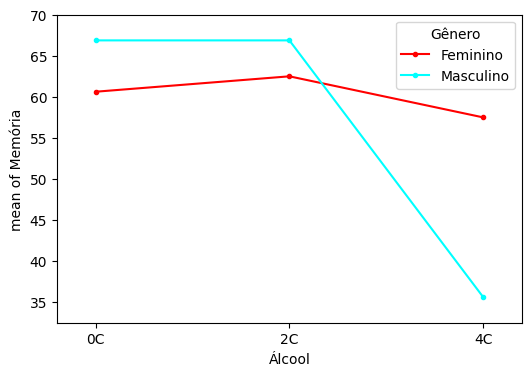

In [30]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x=df["Álcool"],
    trace=df["Gênero"],
    response=df["Memória"], #sempre a variável dependente
    ax=ax
)

É muito comum gráficos de interação em que as linhas se cruzam, a interação ser significativa